# DCIT 311 LAB 3

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('train.csv')
df

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


# Data exploration

In [203]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [204]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [205]:
df.columns.tolist()

['ID',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [206]:
df.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [207]:
df = df.drop(columns=['ID'])
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [208]:
# df.columns.tolist()
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

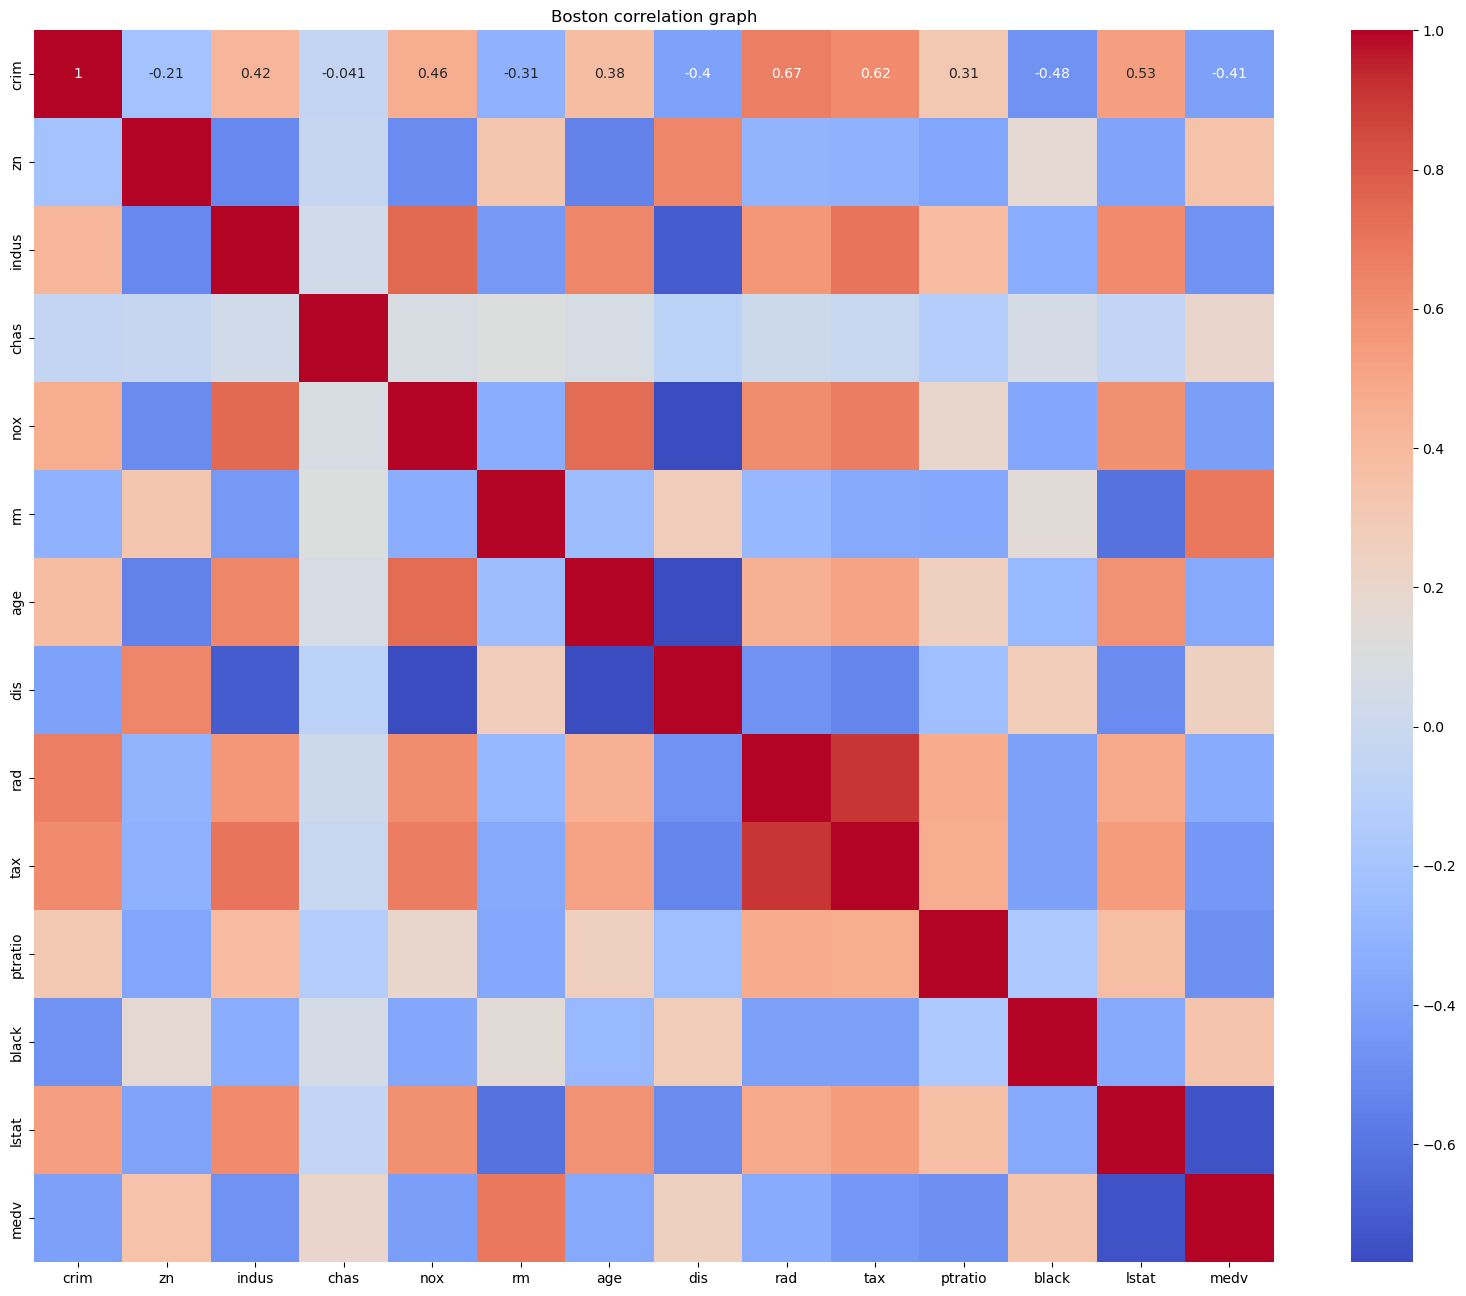

In [209]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Boston correlation graph')
plt.show()

# Data Pre-processing

# Scaling the data set

In [212]:
scaler = MinMaxScaler()
# Features to be scaled
standardize_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
df_scaled = scaler.fit_transform(df[standardize_features])
pd.DataFrame(df_scaled, columns= standardize_features)
df[standardize_features]= df_scaled
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.000000,0.180,0.058148,0,0.314815,0.583656,0.629787,0.308996,0.000000,0.206501,0.313953,1.000000,0.089680,0.422222
1,0.000285,0.000,0.234444,0,0.172840,0.553834,0.775532,0.400545,0.043478,0.103250,0.604651,1.000000,0.204470,0.368889
2,0.000354,0.000,0.053333,0,0.150206,0.665569,0.423404,0.514848,0.086957,0.065010,0.709302,0.994230,0.033389,0.631111
3,0.000853,0.000,0.053333,0,0.150206,0.694423,0.512766,0.514848,0.086957,0.065010,0.709302,1.000000,0.099338,0.693333
4,0.001115,0.125,0.264074,0,0.286008,0.474632,0.644681,0.462482,0.173913,0.235182,0.302326,0.996695,0.295254,0.397778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.002333,0.000,0.331481,0,0.411523,0.388846,0.718085,0.132589,0.217391,0.388145,0.767442,0.997128,0.368929,0.277778
329,0.000766,0.000,0.414444,0,0.386831,0.587142,0.671277,0.140804,0.000000,0.162524,0.976744,0.987519,0.219095,0.386667
330,0.000530,0.000,0.414444,0,0.386831,0.495546,0.752128,0.120858,0.000000,0.162524,0.976744,1.000000,0.202815,0.346667
331,0.000740,0.000,0.414444,0,0.386831,0.661309,0.904255,0.108332,0.000000,0.162524,0.976744,1.000000,0.107892,0.420000


In [213]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.045616,0.106892,0.390870,0.060060,0.354206,0.523745,0.661983,0.269326,0.375375,0.423096,0.680006,0.904845,0.297611,0.394862
std,0.099993,0.226748,0.259190,0.237956,0.236532,0.136319,0.299291,0.206783,0.380095,0.326658,0.250212,0.220093,0.195027,0.203855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000988,0.000000,0.162593,0.000000,0.139918,0.449845,0.419149,0.103625,0.130435,0.173996,0.558140,0.948729,0.150386,0.275556
50%,0.003473,0.000000,0.339259,0.000000,0.314815,0.511425,0.752128,0.204860,0.173913,0.271511,0.744186,0.987672,0.254967,0.368889
75%,0.049939,0.125000,0.642963,0.000000,0.506173,0.587529,0.934043,0.416160,1.000000,0.913958,0.883721,0.998322,0.405353,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   zn       333 non-null    float64
 2   indus    333 non-null    float64
 3   chas     333 non-null    int64  
 4   nox      333 non-null    float64
 5   rm       333 non-null    float64
 6   age      333 non-null    float64
 7   dis      333 non-null    float64
 8   rad      333 non-null    float64
 9   tax      333 non-null    float64
 10  ptratio  333 non-null    float64
 11  black    333 non-null    float64
 12  lstat    333 non-null    float64
 13  medv     333 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 36.6 KB


In [215]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# Training the linear regression model

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [218]:
X=df[['rm']]
Y=df[['medv']]

In [219]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [220]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [221]:
predicting_y = model.predict(X_test)
predicting_y

array([[ 0.38568893],
       [ 0.3891227 ],
       [ 0.43586012],
       [ 0.46561946],
       [ 0.4196451 ],
       [ 0.33322856],
       [ 0.38511664],
       [ 0.53887322],
       [ 0.32903173],
       [ 0.4501675 ],
       [ 0.48183449],
       [ 0.36375096],
       [ 0.32082884],
       [ 0.68213772],
       [ 0.27065764],
       [ 0.57149403],
       [ 0.32197343],
       [ 0.23174159],
       [ 0.39389183],
       [ 0.38397205],
       [ 0.62948659],
       [ 0.46065957],
       [ 0.3891227 ],
       [ 0.45798886],
       [ 0.41735592],
       [ 0.79850437],
       [ 0.24108907],
       [ 0.17241367],
       [ 0.46581023],
       [ 0.24127983],
       [ 0.36604014],
       [ 0.40591002],
       [ 0.42498652],
       [ 0.31796736],
       [ 0.50434475],
       [ 0.31758583],
       [ 0.39122112],
       [ 0.03410906],
       [ 0.26798693],
       [ 0.2637901 ],
       [ 0.34505599],
       [ 0.55604207],
       [ 0.42899258],
       [ 0.62586205],
       [ 0.71342318],
       [ 0

In [222]:
predicting_y1 = model.predict([[0.583656]])
predicting_y1

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.45512731]])

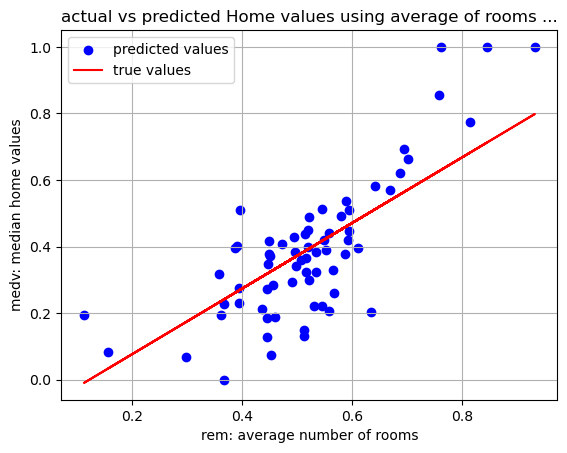

In [223]:
plt.scatter(X_test,Y_test, color='blue', label='predicted values')
plt.plot(X_test,predicting_y, color='red', label='true values')
plt.xlabel('rem: average number of rooms')
plt.ylabel('medv: median home values')
plt.title('actual vs predicted Home values using average of rooms ...')
plt.legend()
plt.grid(True)
plt.show()

# Calculating the error of Linear Regression

In [225]:
mse = mean_squared_error(Y_test,predicting_y)
r2= r2_score(Y_test, predicting_y)
print(f"mean squared error is : {mse}")
print(f"R squared error is : {r2}")

mean squared error is : 0.01795635679797026
R squared error is : 0.595974711770942


# Multiple regression model

In [227]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(columns=['medv']),df['medv'], test_size=0.2, random_state=42)

In [228]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [229]:
pred_y= model.predict(X_test)
pred_y

array([ 0.43336477,  0.40782636,  0.3902404 ,  0.62824526,  0.4309287 ,
        0.20864033,  0.27965345,  0.56055167,  0.25292056,  0.46111148,
        0.46557542,  0.31740321,  0.34242128,  0.65014875,  0.37704493,
        0.6469521 ,  0.38380452,  0.26637712,  0.44318665,  0.26480274,
        0.68881227,  0.58830616,  0.40437879,  0.51817152,  0.24350102,
        0.81785864,  0.05360288, -0.08359565,  0.58082919,  0.12076546,
        0.31925245,  0.34930213,  0.48979978,  0.21475406,  0.3138371 ,
        0.16216682,  0.51094468, -0.01291665,  0.25771852,  0.39100074,
        0.41251597,  0.36702978,  0.45209427,  0.76087605,  0.68693876,
        0.35339698,  0.13206803,  0.35211712,  0.19449274,  0.34675889,
        0.17606896,  0.52672542,  0.38830594,  0.17458732,  0.63987318,
       -0.09012271,  0.32353158,  0.48181067,  0.44948014,  0.52857688,
        0.29119155,  0.42894443,  0.29296822,  0.49584254,  0.39953636,
        0.26968521,  0.46735312])

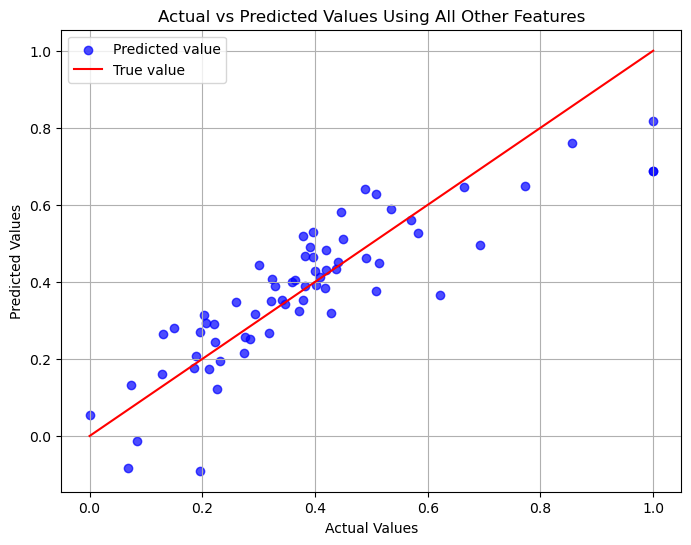

In [230]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, pred_y, color='blue', label='Predicted value', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='True value')
plt.title('Actual vs Predicted Values Using All Other Features')
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Cacluating error of multiple regression

In [258]:
mse = mean_squared_error(Y_test,pred_y)
r2= r2_score(Y_test, pred_y)
print(f"mean squared error is : {mse}")
print(f"R squared error is : {r2}")

mean squared error is : 0.011598387750827562
R squared error is : 0.739031586042544
